## Indicators of Heavy Traffic on I-94 (East to West)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


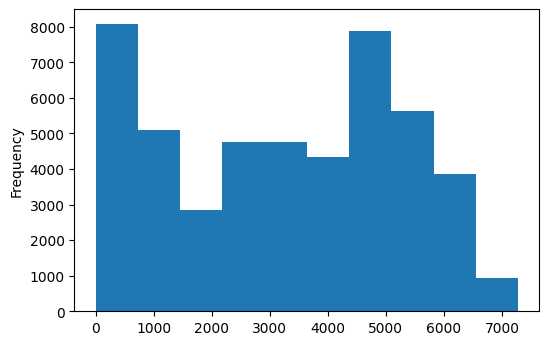

In [5]:
metro['traffic_volume'].plot.hist()

In [6]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
metro['date_time']=pd.to_datetime(metro['date_time'])
daytime = metro[(metro['date_time'].dt.hour >=7) & 
                (metro['date_time'].dt.hour <19)].copy()

night = metro[(metro['date_time'].dt.hour >=19) | 
                (metro['date_time'].dt.hour <7)].copy()

Text(0.5, 1.0, 'Traffic During Night Time')

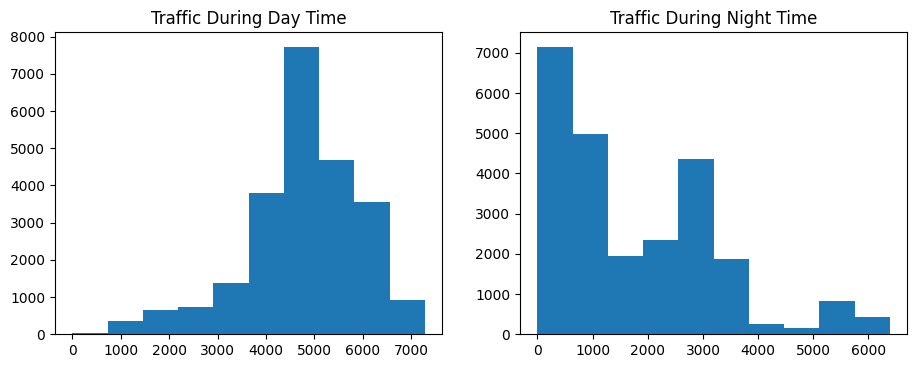

In [8]:
plt.figure(figsize=(11, 4))
plt.subplot(1,2,1)
plt.hist(daytime['traffic_volume'])
plt.title('Traffic During Day Time')
plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic During Night Time')

In [9]:
print("Day Time")
print(daytime['traffic_volume'].describe())
print('\n')
print('Night Time')
print(night['traffic_volume'].describe())

Day Time
count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


Night Time
count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


* About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

* About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.

In [10]:
daytime['month']=daytime['date_time'].dt.month
daytime['year'] =daytime['date_time'].dt.year
daytime['dayofweek'] =daytime['date_time'].dt.dayofweek
daytime['timeofweek']=daytime['date_time'].dt.hour

month = daytime.groupby('month').mean()
year = daytime.groupby('year').mean()
dayofweek = daytime.groupby('dayofweek').mean()
timeofweek = daytime.groupby('timeofweek').mean()



Text(0.5, 1.0, 'time')

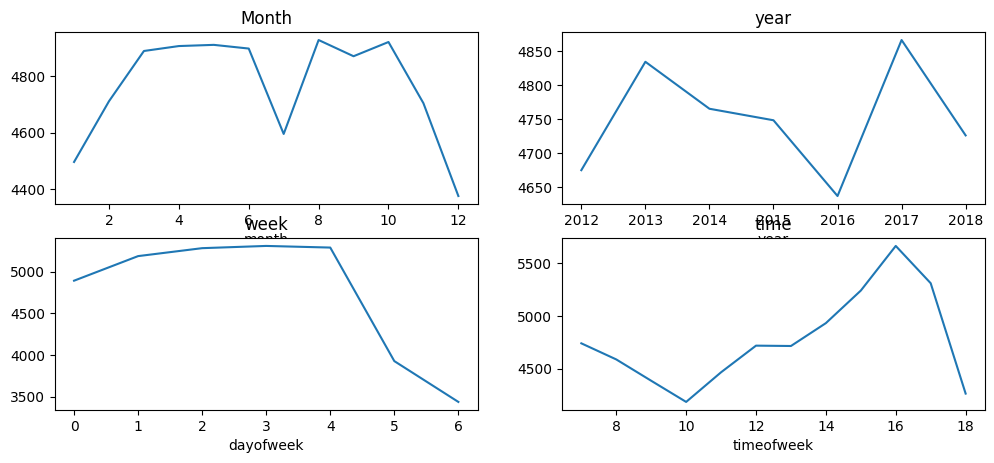

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(2,2,1)
month['traffic_volume'].plot.line()
plt.title('Month')
plt.subplot(2,2,2)
year['traffic_volume'].plot.line()
plt.title('year')
plt.subplot(2,2,3)
dayofweek['traffic_volume'].plot.line()
plt.title('week')
plt.subplot(2,2,4)
timeofweek['traffic_volume'].plot.line()
plt.title('time')


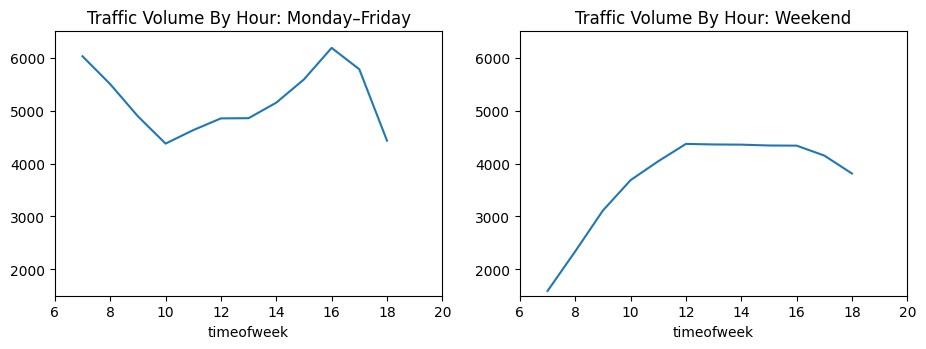

In [16]:
#traffic during weekdays and weekend
bussiness_days = daytime.copy()[daytime['dayofweek'] <= 4] 
weekend = daytime.copy()[daytime['dayofweek'] >= 5] 
by_hour_business = bussiness_days.groupby('timeofweek').mean()
by_hour_weekend = weekend.groupby('timeofweek').mean()


plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

### Weather Indicators

In [17]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
timeofweek        0.172704
Name: traffic_volume, dtype: float64

Temperature has the strongest correlation with traffic volume. 

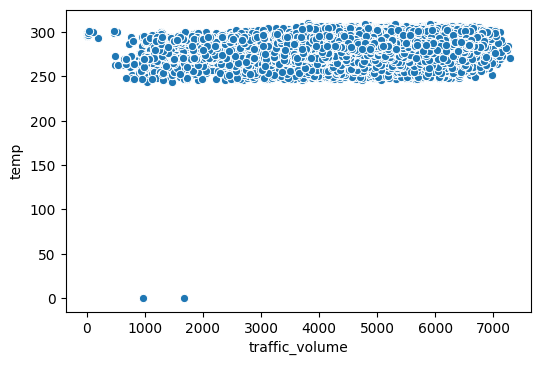

In [23]:
sns.scatterplot('traffic_volume', 'temp', data=daytime)
#plt.ylim(220, 230)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.Let's now look at the other weather-related columns: weather_main and weather_description

In [29]:
weather = daytime.groupby('weather_main').mean()

weather['traffic_volume'].plot.barh()
plt.show()

NameError: name 'figsize' is not defined

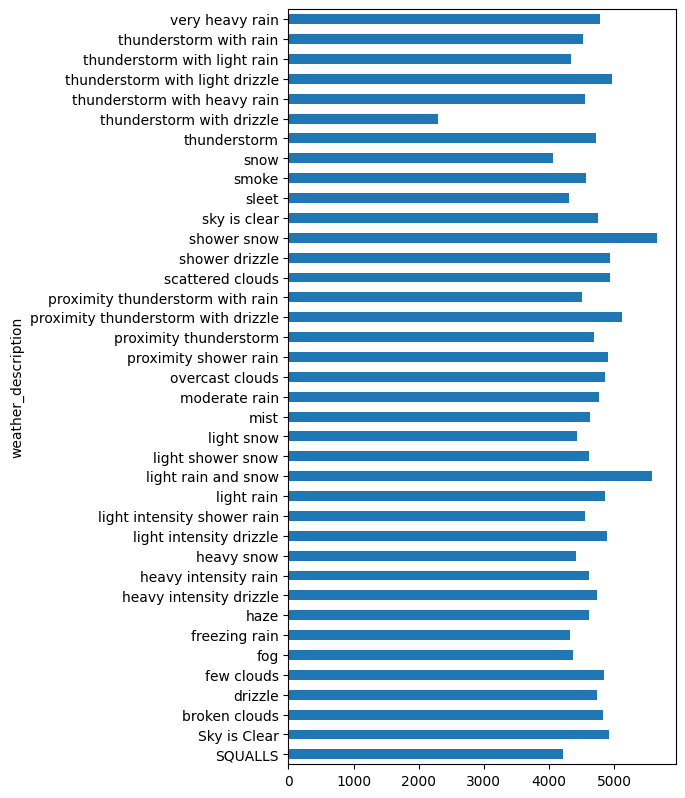

In [31]:
weather_description = daytime.groupby('weather_description').mean()
plt.figure(figsize=(5,10))
weather_description['traffic_volume'].plot.barh()
plt.show()

The weather description; shower snow, light rain and snow, and proximity thunderstorm with dizzle exceed traffic volume 5,000. 

### Conclusion

The traffic volume is generally higher during 
* warm months (March - Octorber) compared to cold months (Nov - Feb)
* traffic volume is higher during the weekdays and business hours compared to weekend
* on weekdays, the rush hours are around 7-16

Weather indicators
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle